In [12]:
import pandas as pd

run1 = pd.read_parquet("/home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/results/full_1/daic/runtime/cpu/runtime_synthetic.parquet")
run2 = pd.read_json("/home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/results/full_1/daic/runtime/cpu/synthetic/merged.log.bup", lines=True)
run1 = run1[
    # (run1.operator == "Left multiply") & 
            (run1.num_cores != 'GPU')]
run1.num_cores = run1.num_cores.astype(int)
run2['dataset_replaced'] = run2.dataset.str.replace(r"\/mnt\/data\/synthetic\/sigmod_extended/", "/user/data/generated/", regex=True).replace("(100k|500k|1M|sparsity_focus)\/", "", regex=True)
# run2 = run2[(run2.operator == "Left multiply") 
#             & (run2.dataset_type == 'synthetic')
#             ]
run1

,dataset,join,operator,model,tuple_ratio,feature_ratio,cardinality_T,cardinality_S,complexity,selectivity,times,num_cores,data_characteristics,profile_times,times_std,times_mean,source_file,compute_type,dataset_type,compute_unit
index,,,,,,,,,,,,,,,,,,,,
0,/user/data/generated/n_R=1-r_T=500000-c_T=10-r...,preset,Noop,materialized,56.663645,10.0,500000,508824,NaN,1.017648,"b'[4.409812390804291e-07,4.209578037261963e-07...",24,"b'{""r_T"":500000,""c_T"":10,""r_S"":500000,""c_S"":1,...",NaN,5.660491e-08,3.305678e-07,daic/runtime/cpu/synthetic/2023-07-03_05-21-45...,cpu,synthetic,CPU 24c
1,/user/data/generated/n_R=1-r_T=500000-c_T=10-r...,preset,Noop,factorized,56.663645,10.0,500000,508824,NaN,1.017648,"b'[4.700850695371628e-07,5.611218512058258e-07...",24,"b'{""r_T"":500000,""c_T"":10,""r_S"":500000,""c_S"":1,...",NaN,7.463363e-08,4.461294e-07,daic/runtime/cpu/synthetic/2023-07-03_05-21-45...,cpu,synthetic,CPU 24c
2,/user/data/generated/n_R=1-r_T=500000-c_T=10-r...,preset,Left multiply,materialized,56.663645,10.0,500000,508824,3231770.0,1.017648,"b'[0.0041173181962220005,0.0035584690049290002...",24,"b'{""r_T"":500000,""c_T"":10,""r_S"":500000,""c_S"":1,...",NaN,1.349048e-02,8.459156e-03,daic/runtime/cpu/synthetic/2023-07-03_05-21-45...,cpu,synthetic,CPU 24c
3,/user/data/generated/n_R=1-r_T=500000-c_T=10-r...,preset,Left multiply,factorized,56.663645,10.0,500000,508824,579416.0,1.017648,"b'[0.0021613840945060004,0.00111139495857,0.00...",24,"b'{""r_T"":500000,""c_T"":10,""r_S"":500000,""c_S"":1,...",NaN,5.465260e-04,7.286479e-04,daic/runtime/cpu/synthetic/2023-07-03_05-21-45...,cpu,synthetic,CPU 24c
4,/user/data/generated/n_R=1-r_T=500000-c_T=10-r...,preset,Right multiply,materialized,56.663645,10.0,500000,508824,3231770.0,1.017648,"b'[0.002876969054341,0.00287619815208,0.002872...",24,"b'{""r_T"":500000,""c_T"":10,""r_S"":500000,""c_S"":1,...",NaN,2.469727e-05,2.853290e-03,daic/runtime/cpu/synthetic/2023-07-03_05-21-45...,cpu,synthetic,CPU 24c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,/user/data/generated/n_R=1-r_T=500000-c_T=50-r...,preset,Gaussian,factorized,1.000000,1.0,500000,1000000,250000000.0,2.000000,"b'[3.177668961929157,2.803297644946724,3.20452...",8,"b'{""r_T"":500000,""c_T"":50,""r_S"":500000,""c_S"":50...",NaN,1.603470e-01,3.131443e+00,daic/runtime/cpu/synthetic/2023-07-02_14-52-18...,cpu,synthetic,CPU 8c
2660,/user/data/generated/n_R=1-r_T=500000-c_T=50-r...,preset,KMeans,materialized,1.000000,1.0,500000,1000000,250000000.0,2.000000,"b'[3.504919584142044,3.621159781003371,3.44967...",8,"b'{""r_T"":500000,""c_T"":50,""r_S"":500000,""c_S"":50...",NaN,8.038530e-02,3.555139e+00,daic/runtime/cpu/synthetic/2023-07-02_14-52-18...,cpu,synthetic,CPU 8c
2661,/user/data/generated/n_R=1-r_T=500000-c_T=50-r...,preset,KMeans,factorized,1.000000,1.0,500000,1000000,400000000.0,2.000000,"b'[6.814846187131479,7.02439509308897,6.887439...",8,"b'{""r_T"":500000,""c_T"":50,""r_S"":500000,""c_S"":50...",NaN,2.717558e-01,7.213457e+00,daic/runtime/cpu/synthetic/2023-07-02_14-52-18...,cpu,synthetic,CPU 8c


In [16]:
len(run1.dataset.unique())

1785

In [23]:
len(run2[run2.dataset.str.contains("spars")].dataset.unique())

630

In [22]:
run1.merge(run2, how="inner", on=["dataset", "join", "operator", "model", "num_cores"])

,dataset,join,operator,model,tuple_ratio_x,feature_ratio_x,cardinality_T_x,cardinality_S_x,complexity_x,selectivity_x,...,feature_ratio_y,cardinality_T_y,cardinality_S_y,complexity_y,selectivity_y,times_y,data_characteristics_y,profile_times_y,times_std_y,times_mean_y
0,/user/data/generated/n_R=1-r_T=100000-c_T=50-r...,preset,KMeans,materialized,11.738620,10.0,97666,97667,59024528.0,1.00001,...,10.0,97666,97667,64719804,1.00001,"[0.7348526180139741, 0.716130316999624, 0.7166...","{'r_S': 90000, 'c_S': 5, 'TR': 11.738620059997...",NaN,0.011222,0.719689
1,/user/data/generated/n_R=1-r_T=100000-c_T=50-r...,preset,KMeans,factorized,11.738620,10.0,97666,97667,36777908.0,1.00001,...,10.0,97666,97667,38373569,1.00001,"[1.765190000005532, 1.729654259994276, 1.83068...","{'r_S': 90000, 'c_S': 5, 'TR': 11.738620059997...",NaN,0.107108,1.728617
2,/user/data/generated/n_R=1-r_T=100000-c_T=30-r...,preset,KMeans,materialized,5.000000,5.0,100000,120000,38640008.0,1.20000,...,5.0,100000,120000,46112016,1.20000,"[0.7369544370012591, 0.575174361998506, 0.5754...","{'r_S': 100000, 'c_S': 6, 'TR': 5.0, 'FR': 5.0...",NaN,0.047829,0.606413
3,/user/data/generated/n_R=1-r_T=100000-c_T=30-r...,preset,KMeans,factorized,5.000000,5.0,100000,120000,29952008.0,1.20000,...,5.0,100000,120000,32912016,1.20000,"[1.112779512994166, 1.3353205739986151, 1.2862...","{'r_S': 100000, 'c_S': 6, 'TR': 5.0, 'FR': 5.0...",NaN,0.154158,1.389670
4,/user/data/generated/n_R=1-r_T=100000-c_T=10-r...,preset,KMeans,materialized,56.657224,10.0,100000,101765,11170832.0,1.01765,...,10.0,100000,101765,12256480,1.01765,"[0.38882630100033505, 0.23734746599984602, 0.2...","{'r_S': 100000, 'c_S': 1, 'TR': 56.65722379603...",NaN,0.093434,0.328401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19035,/user/data/generated/n_R=1-r_T=100000-c_T=50-r...,preset,Linear Regression,factorized,40.502228,4.5,100000,102469,12820970.0,1.02469,...,4.5,100000,102469,13358005,1.02469,"[3.635997913996107, 4.958367425002507, 4.94844...","{'r_S': 100000, 'c_S': 10, 'TR': 40.5022276225...",NaN,0.700137,4.937959
19036,/user/data/generated/n_R=1-r_T=100000-c_T=50-r...,preset,Gaussian,materialized,40.502228,4.5,100000,102469,40000000.0,1.02469,...,4.5,100000,102469,44000000,1.02469,"[0.385807245998876, 0.38299840000399804, 0.386...","{'r_S': 100000, 'c_S': 10, 'TR': 40.5022276225...",NaN,0.001564,0.383228
19037,/user/data/generated/n_R=1-r_T=100000-c_T=50-r...,preset,Gaussian,factorized,40.502228,4.5,100000,102469,25641940.0,1.02469,...,4.5,100000,102469,26716010,1.02469,"[1.001911100000143, 0.9251479929953341, 1.0266...","{'r_S': 100000, 'c_S': 10, 'TR': 40.5022276225...",NaN,0.109838,1.065140
19038,/user/data/generated/n_R=1-r_T=100000-c_T=50-r...,preset,Logistic Regression,materialized,40.502228,4.5,100000,102469,20000000.0,1.02469,...,4.5,100000,102469,22000000,1.02469,"[0.419351556003675, 0.41865214900462805, 0.418...","{'r_S': 100000, 'c_S': 10, 'TR': 40.5022276225...",NaN,0.001218,0.418829


In [23]:
m = run1.merge(run2, how="inner", on=["dataset", "join", "operator", "model", "num_cores"])
m['mean_diff'] = m.times_mean_x - m.times_mean_y
m[['mean_diff', 'times_std_x', 'times_std_y']]

,mean_diff,times_std_x,times_std_y
0,0.256509,0.041351,0.011222
1,-0.367849,0.084257,0.107108
2,0.195782,0.043579,0.047829
3,0.013259,0.074949,0.154158
4,0.144791,0.048578,0.093434
...,...,...,...
19035,-3.578786,0.123764,0.700137
19036,-0.026710,0.004420,0.001564
19037,-0.861857,0.030815,0.109838
19038,-0.012164,0.006960,0.001218


(-0.25, 0.25)

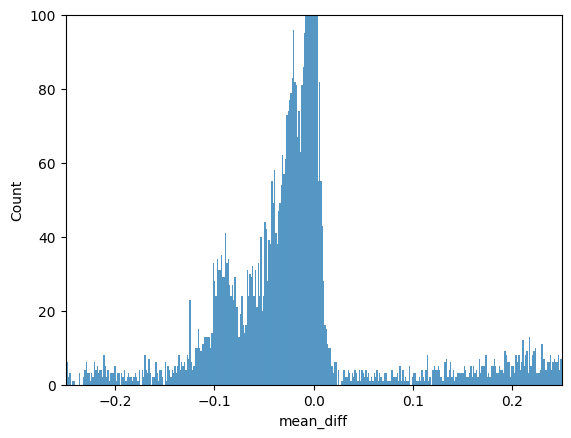

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
sns.histplot(m['mean_diff'], ax=ax)
ax.set_ylim(0, 100)
ax.set_xlim(-0.25, 0.25)